# Descriptive statistics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from datetime import datetime

# Para gráficos e visualizações de correlações
import seaborn as sns
import matplotlib.pyplot as plt

### Vue initiale de l'ensemble de données

In [ ]:
ds1 = pd.read_csv('dengue.csv')

<ipython-input-4-61259b5ce142>:1: DtypeWarning: Columns (5,9,10,52) have mixed types. Specify dtype option on import or set low_memory=False.
  ds1 = pd.read_csv('dengue.csv')


In [ ]:
ds1.head(10)

,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,...,HISTOPA_N,IMUNOH_N,HOSPITALIZ,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,EVOLUCAO,DT_ENCERRA
0,A90,2018-05-07,201819,2018,25,251620,1426.0,2504537.0,2018-05-06,201819,...,4.0,4.0,9.0,9.0,9.0,9.0,9.0,Dengue,1.0,2018-07-01
1,A90,2018-02-05,201806,2018,25,250840,1426.0,2606399.0,2018-02-03,201805,...,4.0,4.0,9.0,9.0,9.0,9.0,9.0,Dengue,1.0,2018-03-26
2,A90,2018-01-22,201804,2018,25,250840,1426.0,2606399.0,2018-01-05,201801,...,4.0,4.0,9.0,9.0,9.0,9.0,9.0,Dengue,1.0,2018-02-27
3,A90,2018-05-07,201819,2018,25,251080,1422.0,2605481.0,2018-05-04,201818,...,4.0,4.0,2.0,9.0,9.0,9.0,9.0,Discarded/Inconclusive,1.0,2018-07-07
4,A90,2018-04-09,201815,2018,25,251080,1422.0,2605481.0,2018-04-02,201814,...,4.0,4.0,1.0,9.0,9.0,9.0,9.0,Discarded/Inconclusive,1.0,2018-09-04
5,A90,2018-11-28,201848,2018,26,260800,1499.0,2433788.0,2018-11-26,201848,...,4.0,4.0,2.0,9.0,9.0,9.0,9.0,Discarded/Inconclusive,9.0,2018-12-03
6,A90,2018-05-08,201819,2018,26,260800,1499.0,2433788.0,2018-05-06,201819,...,4.0,4.0,2.0,1.0,25.0,1.0,250390.0,Dengue,1.0,2018-05-14
7,A90,2018-07-25,201830,2018,25,251450,1425.0,2606801.0,2018-07-21,201829,...,4.0,4.0,2.0,1.0,25.0,1.0,251450.0,Dengue,1.0,2018-08-21
8,A90,2018-07-06,201827,2018,25,250370,1425.0,7321775.0,2018-07-05,201827,...,4.0,4.0,9.0,9.0,9.0,9.0,9.0,Discarded/Inconclusive,9.0,2018-08-13
9,A90,2018-06-12,201824,2018,25,250370,1425.0,7321775.0,2018-06-09,201823,...,4.0,4.0,9.0,9.0,9.0,9.0,9.0,Discarded/Inconclusive,9.0,2018-07-23


### Types de variables
#### Variables catégorielles : « object »

In [ ]:
ds1.dtypes

ID_AGRAVO      object
DT_NOTIFIC     object
SEM_NOT         int64
NU_ANO          int64
SG_UF_NOT       int64
ID_MUNICIP     object
ID_REGIONA    float64
ID_UNIDADE    float64
DT_SIN_PRI     object
SEM_PRI        object
DT_NASC        object
NU_IDADE_N    float64
CS_SEXO         int64
CS_GESTANT    float64
CS_RACA       float64
CS_ESCOL_N    float64
SG_UF         float64
ID_MN_RESI      int64
ID_RG_RESI    float64
ID_PAIS       float64
DT_INVEST      object
FEBRE         float64
MIALGIA       float64
CEFALEIA      float64
EXANTEMA      float64
VOMITO        float64
NAUSEA        float64
DOR_COSTAS    float64
CONJUNTVIT    float64
ARTRITE       float64
ARTRALGIA     float64
PETEQUIA_N    float64
LEUCOPENIA    float64
LACO          float64
DOR_RETRO     float64
DIABETES      float64
HEMATOLOG     float64
HEPATOPAT     float64
RENAL         float64
HIPERTENSA    float64
ACIDO_PEPT    float64
AUTO_IMUNE    float64
RESUL_SORO    float64
RESUL_NS1     float64
RESUL_VI_N    float64
RESUL_PCR_

In [ ]:
# Substitui NaN por 0 para todas as colunas float64
ds1.fillna(0, inplace=True)

# Seleciona todas as colunas que são do tipo float64 e converte para int64
float_cols = ds1.select_dtypes(include=['float64']).columns
ds1[float_cols] = ds1[float_cols].astype('int64')

# Seleciona as colunas que começam com 'DT' e converte para formato de data
date_cols = [col for col in ds1.columns if col.startswith('DT')]
ds1[date_cols] = ds1[date_cols].apply(pd.to_datetime, errors='coerce')

# Verificando se a conversão foi bem-sucedida
ds1.dtypes

ID_AGRAVO             object
DT_NOTIFIC    datetime64[ns]
SEM_NOT                int64
NU_ANO                 int64
SG_UF_NOT              int64
ID_MUNICIP            object
ID_REGIONA             int64
ID_UNIDADE             int64
DT_SIN_PRI    datetime64[ns]
SEM_PRI               object
DT_NASC       datetime64[ns]
NU_IDADE_N             int64
CS_SEXO                int64
CS_GESTANT             int64
CS_RACA                int64
CS_ESCOL_N             int64
SG_UF                  int64
ID_MN_RESI             int64
ID_RG_RESI             int64
ID_PAIS                int64
DT_INVEST     datetime64[ns]
FEBRE                  int64
MIALGIA                int64
CEFALEIA               int64
EXANTEMA               int64
VOMITO                 int64
NAUSEA                 int64
DOR_COSTAS             int64
CONJUNTVIT             int64
ARTRITE                int64
ARTRALGIA              int64
PETEQUIA_N             int64
LEUCOPENIA             int64
LACO                   int64
DOR_RETRO     

In [ ]:
ds1.head()

,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,...,HISTOPA_N,IMUNOH_N,HOSPITALIZ,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,EVOLUCAO,DT_ENCERRA
0,A90,2018-05-07,201819,2018,25,251620,1426,2504537,2018-05-06,201819,...,4,4,9,9,9,9,9.0,Dengue,1,2018-07-01
1,A90,2018-02-05,201806,2018,25,250840,1426,2606399,2018-02-03,201805,...,4,4,9,9,9,9,9.0,Dengue,1,2018-03-26
2,A90,2018-01-22,201804,2018,25,250840,1426,2606399,2018-01-05,201801,...,4,4,9,9,9,9,9.0,Dengue,1,2018-02-27
3,A90,2018-05-07,201819,2018,25,251080,1422,2605481,2018-05-04,201818,...,4,4,2,9,9,9,9.0,Discarded/Inconclusive,1,2018-07-07
4,A90,2018-04-09,201815,2018,25,251080,1422,2605481,2018-04-02,201814,...,4,4,1,9,9,9,9.0,Discarded/Inconclusive,1,2018-09-04


### Nombre de valeurs manquantes dans chaque colonne

In [ ]:
ds1.isnull().sum()

ID_AGRAVO          0
DT_NOTIFIC         0
SEM_NOT            0
NU_ANO             0
SG_UF_NOT          0
ID_MUNICIP         0
ID_REGIONA         0
ID_UNIDADE         0
DT_SIN_PRI        25
SEM_PRI            0
DT_NASC       622118
NU_IDADE_N         0
CS_SEXO            0
CS_GESTANT         0
CS_RACA            0
CS_ESCOL_N         0
SG_UF              0
ID_MN_RESI         0
ID_RG_RESI         0
ID_PAIS            0
DT_INVEST       1628
FEBRE              0
MIALGIA            0
CEFALEIA           0
EXANTEMA           0
VOMITO             0
NAUSEA             0
DOR_COSTAS         0
CONJUNTVIT         0
ARTRITE            0
ARTRALGIA          0
PETEQUIA_N         0
LEUCOPENIA         0
LACO               0
DOR_RETRO          0
DIABETES           0
HEMATOLOG          0
HEPATOPAT          0
RENAL              0
HIPERTENSA         0
ACIDO_PEPT         0
AUTO_IMUNE         0
RESUL_SORO         0
RESUL_NS1          0
RESUL_VI_N         0
RESUL_PCR_         0
HISTOPA_N          0
IMUNOH_N     

In [ ]:
print(ds1['NU_IDADE_N'].unique())

[4022 4035 4044 4003 4010 4009 4041 4074 4064 4059 4016 4032 4039 4027
 4042 4043 4028 4031 4020 4037 4002 4029 4006 4013 4007 4018 4040 3001
 4014 4008 4005 4015 4025 4033 4070 4054 4019 4024 4058 4047 4050 4060
 4012 2009 4011 4017 4062 4072 4057 4046 4068 4063 4065 4038 4023 2017
 4036 4030 4049 4021 4061 4026 3010 4034 4066 4081 4086 4085 4069 4052
 4056 4073 4053 4078 4075 4045 4076 2020 4051 4080 4001 3007 2001 4004
 4055 4067 3006 3003 4082 4071 4048 4077 4089 2024 3008 3004 3011 4099
 3002 4079 3005 4088 4087 2014 3009 4084 4095 2007 2002 4090 2011 4083
 2003 2049 2013 4096 4091 4098 4093 2004 4097 2018 2029 2015 2000 3042
 3033 3016 2012 4000 2016 4403 2023 3019 4100 2010 4092 2008 2006   36
 4094 2028 2019 2027 2025 2022 2021 2005 3015 2026 2030 4101   39 4105
 4106    2 4108 4406   21 4104   41 4404 1050 4103 4440 1030 4115   29
 4402   38 4405 4112 4102 4407 4400 3068 4401 2057 4109   27   23   43
   26 4116 3041   14   34 3061 4119 3023   54 4120 3025 2044 2038 3017
 3031 

Para resolver o problema e preencher a coluna DT_NASC com a data resultante da diferença entre DT_NOTIFIC e NU_IDADE_N (com base em diferentes unidades de tempo: horas, dias, meses e anos), podemos implementar o seguinte código:

In [ ]:
import pandas as pd

# Função para converter NU_IDADE_N
def converter_idade(idade):
    if pd.isna(idade):  # Verifica se a idade é NaN
        return "Idade ausente"  # Retorna uma mensagem ou um valor padrão para NaN

    str_idade = str(idade)

    # Verifica se a string tem pelo menos dois caracteres
    if len(str_idade) < 2:
        return "Formato inválido"

    unidade = int(str_idade[-1])  # Último dígito
    try:
        quantidade = int(str_idade[:-1])  # Parte antes do último dígito
    except ValueError:
        return "Valor não numérico"  # Retorna uma mensagem se não for um número

    # Determina a idade convertida com base na unidade
    if unidade == 1:
        return f"{quantidade} horas"
    elif unidade == 2:
        return f"{quantidade} dias"
    elif unidade == 3:
        return f"{quantidade} meses"
    elif unidade == 4:
        return f"{quantidade} anos"
    else:
        return "Unidade inválida"

# Aplica a função para criar a nova coluna
ds1['IDADE_CONVERTIDA'] = ds1['NU_IDADE_N'].apply(converter_idade)

# Visualiza o resultado
print(ds1[['NU_IDADE_N', 'IDADE_CONVERTIDA']].head())


   NU_IDADE_N  IDADE_CONVERTIDA
0        4022          402 dias
1        4035  Unidade inválida
2        4044          404 anos
3        4003         400 meses
4        4010  Unidade inválida


### Volumétrie du jeu de données

In [ ]:
ds1.shape

(6732542, 57)

In [ ]:
# Remover linhas com DT_SIN_PRI ausente
ds1 = ds1.dropna(subset=['DT_SIN_PRI'])
ds1 = ds1.dropna(subset=['DT_INVEST'])
ds1 = ds1.dropna(subset=['DT_ENCERRA'])

In [ ]:
ds1.shape

(6730305, 57)

### Remoção de linhas não relevantes para o estudo
#### Removendo casos de Chikungunya

In [ ]:
valores_unicos = ds1['CLASSI_FIN'].unique()

print(valores_unicos)

['Dengue' 'Discarded/Inconclusive' 'Chikungunya']


In [ ]:
# Remover todas as linhas onde CLASSI_FIN é igual a "Chikungunya"
ds1 = ds1[ds1['CLASSI_FIN'] != 'Chikungunya']

# Verificar o resultado
print(ds1['CLASSI_FIN'].unique())

['Dengue' 'Discarded/Inconclusive']


In [ ]:
ds1.shape

(6405308, 57)

In [ ]:
ds1.describe()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,DT_NASC,NU_IDADE_N,CS_SEXO,...,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N,HOSPITALIZ,TPAUTOCTO,COUFINF,COPAISINF,EVOLUCAO,DT_ENCERRA
count,6405308,6.405308e+06,6.405308e+06,6.405308e+06,6.405308e+06,6.405308e+06,6405308,6108446,6.405308e+06,6.405308e+06,...,6.405308e+06,6.405308e+06,6.405308e+06,6.405308e+06,6.405308e+06,6.405308e+06,6.405308e+06,6.405308e+06,6.405308e+06,6405308
mean,2016-09-01 08:50:23.090225152,2.016473e+05,2.016353e+03,3.389266e+01,1.452312e+03,3.369772e+06,2016-08-07 16:23:32.449551360,1983-12-31 04:51:47.113004096,3.992627e+03,4.496274e-01,...,3.998838e+00,3.998037e+00,3.999126e+00,3.998800e+00,4.824775e+00,4.654160e+00,2.254258e+01,4.880747e+00,1.749755e+00,2016-10-15 09:55:57.601539584
min,2012-12-30 00:00:00,1.401000e+03,2.012000e+03,1.100000e+01,9.000000e+00,9.000000e+00,1911-07-11 00:00:00,1900-01-01 00:00:00,1.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00,2010-04-12 00:00:00
25%,2015-03-04 00:00:00,2.015090e+05,2.015000e+03,3.100000e+01,1.350000e+03,2.088134e+06,2015-02-27 00:00:00,1971-10-10 00:00:00,4.018000e+03,0.000000e+00,...,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,2015-04-01 00:00:00
50%,2016-03-09 00:00:00,2.016100e+05,2.016000e+03,3.300000e+01,1.449000e+03,2.520095e+06,2016-03-05 00:00:00,1986-04-22 00:00:00,4.030000e+03,0.000000e+00,...,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,1.700000e+01,1.000000e+00,1.000000e+00,2016-04-26 00:00:00
75%,2019-04-05 00:00:00,2.019140e+05,2.019000e+03,3.500000e+01,1.511000e+03,5.285747e+06,2019-04-01 00:00:00,1997-07-02 00:00:00,4.044000e+03,1.000000e+00,...,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,9.000000e+00,9.000000e+00,3.500000e+01,9.000000e+00,1.000000e+00,2019-05-10 00:00:00
max,2021-01-02 00:00:00,2.020530e+05,2.021000e+03,5.300000e+01,6.256000e+03,9.999999e+06,2106-05-09 00:00:00,2020-12-28 00:00:00,4.999000e+03,9.000000e+00,...,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,9.000000e+00,9.000000e+00,5.300000e+01,1.750000e+02,9.000000e+00,2021-02-18 00:00:00
std,NaN,1.036636e+03,2.329115e+00,9.096870e+00,6.974922e+02,2.353326e+06,NaN,NaN,3.277301e+02,5.016458e-01,...,4.773503e-02,6.365902e-02,4.258902e-02,4.683771e-02,3.458328e+00,3.923408e+00,1.466894e+01,4.015139e+00,2.330399e+00,NaN


<Axes: ylabel='DT_NOTIFIC'>

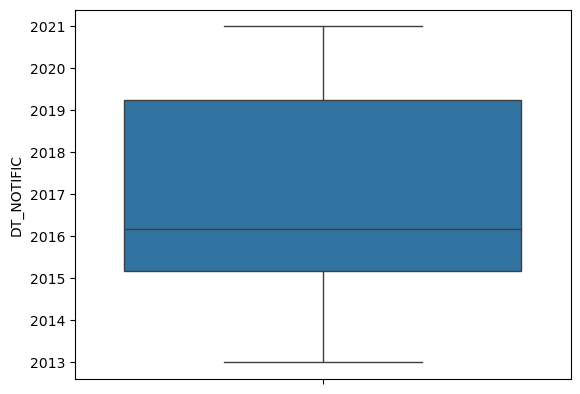

In [ ]:
sns.boxplot(ds1['DT_NOTIFIC'])

<Axes: ylabel='DT_SIN_PRI'>

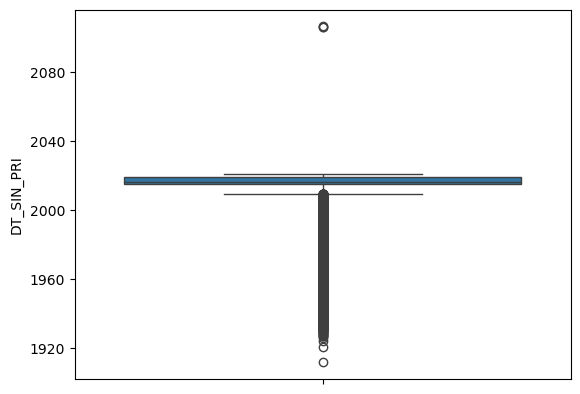

In [ ]:
sns.boxplot(ds1['DT_SIN_PRI'])

<Axes: ylabel='DT_NASC'>

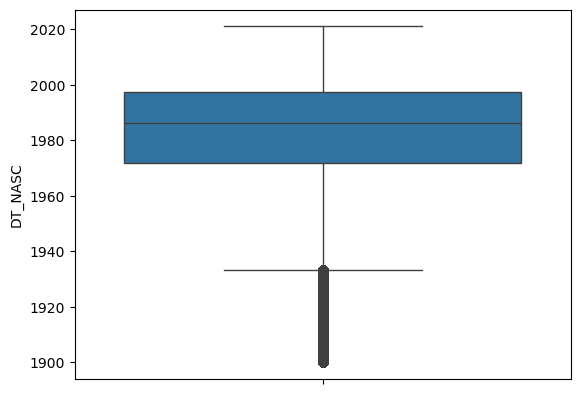

In [ ]:
sns.boxplot(ds1['DT_NASC'])

<Axes: ylabel='DT_INVEST'>

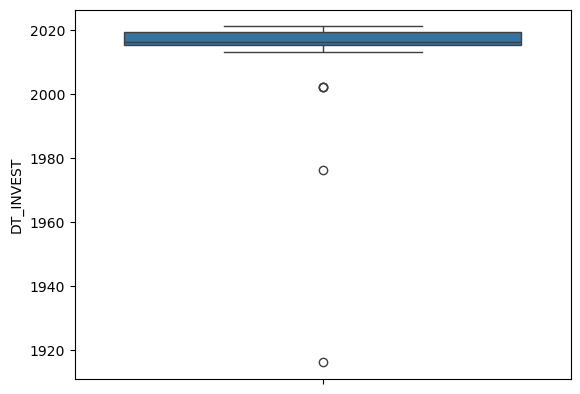

In [ ]:
sns.boxplot(ds1['DT_INVEST'])

<Axes: ylabel='DT_ENCERRA'>

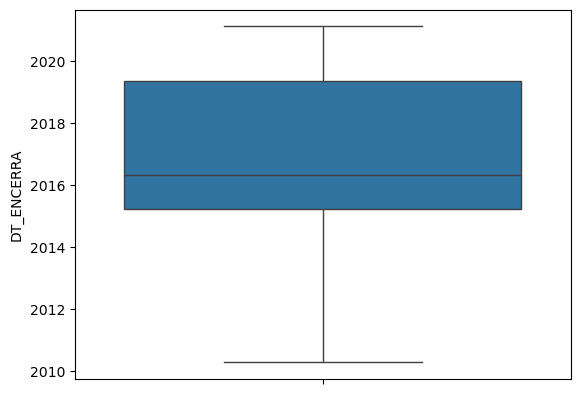

In [ ]:
sns.boxplot(ds1['DT_ENCERRA'])

<Axes: ylabel='ID_REGIONA'>

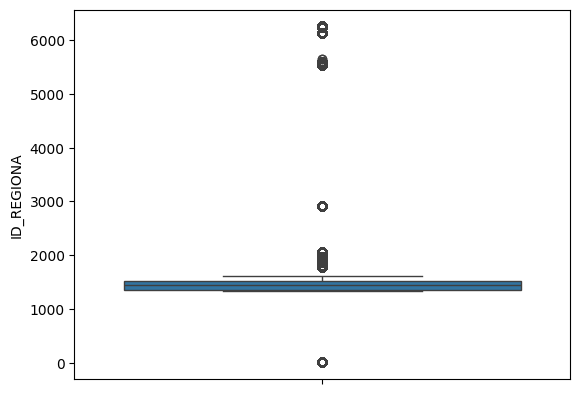

In [ ]:
sns.boxplot(ds1['ID_REGIONA'])

<Axes: ylabel='CS_SEXO'>

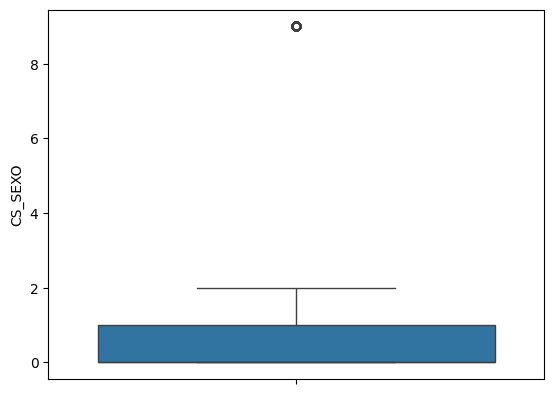

In [ ]:
sns.boxplot(ds1['CS_SEXO'])

<Axes: ylabel='EVOLUCAO'>

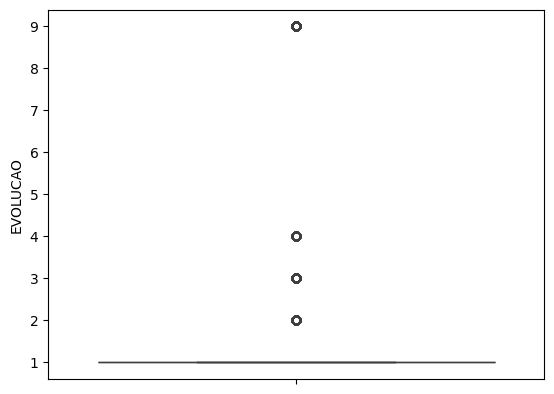

In [ ]:
sns.boxplot(ds1['EVOLUCAO'])

<Axes: xlabel='DT_NOTIFIC', ylabel='DT_SIN_PRI'>

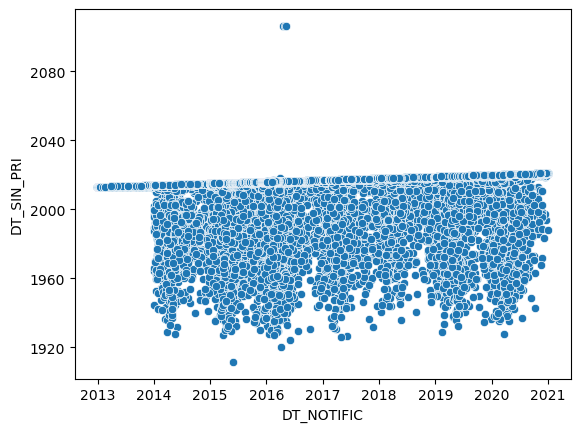

In [ ]:
sns.scatterplot(x='DT_NOTIFIC', y='DT_SIN_PRI', data=ds1)

<Axes: xlabel='DT_NOTIFIC', ylabel='DT_ENCERRA'>

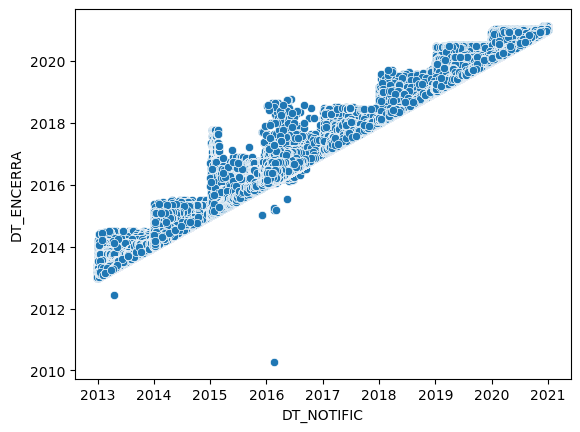

In [ ]:
sns.scatterplot(x='DT_NOTIFIC', y='DT_ENCERRA', data=ds1)

<Axes: xlabel='DT_NOTIFIC', ylabel='DT_NASC'>

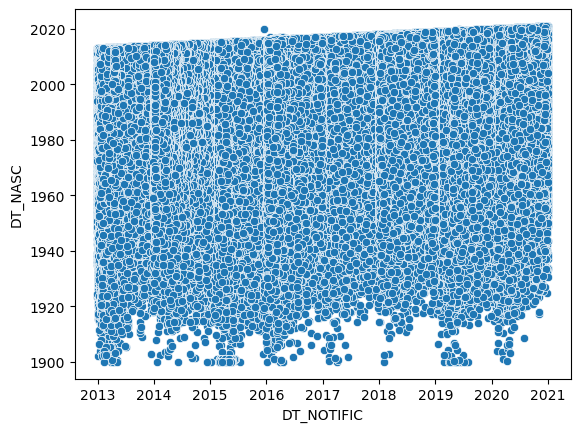

In [ ]:
sns.scatterplot(x='DT_NOTIFIC', y='DT_NASC', data=ds1)

<Axes: xlabel='DT_NOTIFIC', ylabel='DT_INVEST'>

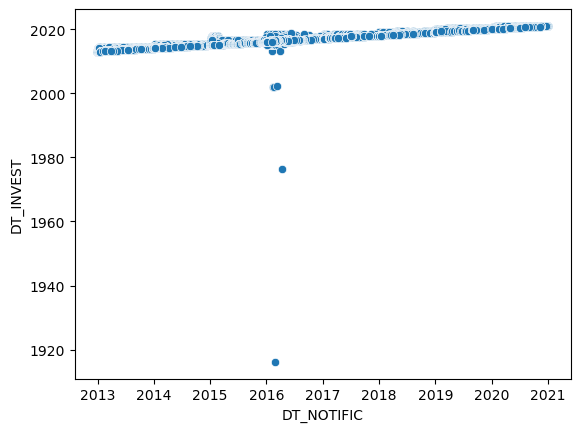

In [ ]:
sns.scatterplot(x='DT_NOTIFIC', y='DT_INVEST', data=ds1)

In [ ]:
# Supondo que a coluna seja 'NU_IDADE_N'
menor_valor = ds1['NU_IDADE_N'].min()
maior_valor = ds1['NU_IDADE_N'].max()

print(f"Menor valor: {menor_valor}")
print(f"Maior valor: {maior_valor}")

Menor valor: 1
Maior valor: 4999


In [ ]:
# Agora encontre o menor e maior valor
menor_data = ds1['DT_NASC'].min()
maior_data = ds1['DT_NASC'].max()

print(f"Menor DT_NASC: {menor_data}")
print(f"Maior DT_NASC: {maior_data}")

Menor DT_NASC: 1900-01-01 00:00:00
Maior DT_NASC: 2020-12-28 00:00:00


In [ ]:
# Agora encontre o menor e maior valor
menor_data = ds1['DT_NOTIFIC'].min()
maior_data = ds1['DT_NOTIFIC'].max()

print(f"Menor DT_NOTIFIC: {menor_data}")
print(f"Maior DT_NOTIFIC: {maior_data}")

Menor DT_NOTIFIC: 2012-12-30 00:00:00
Maior DT_NOTIFIC: 2021-01-02 00:00:00


In [ ]:
# Agora encontre o menor e maior valor
menor_data = ds1['DT_ENCERRA'].min()
maior_data = ds1['DT_ENCERRA'].max()

print(f"Menor DT_ENCERRA: {menor_data}")
print(f"Maior DT_ENCERRA: {maior_data}")

Menor DT_ENCERRA: 2010-04-12 00:00:00
Maior DT_ENCERRA: 2021-02-18 00:00:00


In [ ]:
# Agora encontre o menor e maior valor
menor_data = ds1['DT_INVEST'].min()
maior_data = ds1['DT_INVEST'].max()

print(f"Menor DT_INVEST: {menor_data}")
print(f"Maior DT_INVEST: {maior_data}")

Menor DT_INVEST: 1916-02-26 00:00:00
Maior DT_INVEST: 2021-01-13 00:00:00


In [ ]:
# Agora encontre o menor e maior valor
menor_data = ds1['DT_SIN_PRI'].min()
maior_data = ds1['DT_SIN_PRI'].max()

print(f"Menor DT_SIN_PRI: {menor_data}")
print(f"Maior DT_SIN_PRI: {maior_data}")

Menor DT_SIN_PRI: 1911-07-11 00:00:00
Maior DT_SIN_PRI: 2106-05-09 00:00:00


In [ ]:
# Remover as colunas SEM_NOT, NU_ANO, SEM_PRI, TPAUTOCTO, COPAISINF
# Remover a coluna 'LACO', pois não está bem descrita nos metadados
ds1.drop(columns=['NU_ANO', 'SEM_PRI', 'TPAUTOCTO', 'COPAISINF', 'ID_PAIS', 'LACO'], inplace=True)


In [ ]:
# Tratar valores inválidos em NU_IDADE_N e recalculá-la com base na subtração entre DT_NOTIFIC e DT_NASC
ds1['DT_NOTIFIC'] = pd.to_datetime(ds1['DT_NOTIFIC'], errors='coerce')
ds1['DT_NASC'] = pd.to_datetime(ds1['DT_NASC'], errors='coerce')

In [ ]:
# Calcular a nova NU_IDADE_N a partir da diferença entre DT_NOTIFIC e DT_NASC (em anos)
#ds1['NU_IDADE_N'] = ((ds1['DT_NOTIFIC'] - ds1['DT_NASC']).dt.days / 365.25).astype(int) MELHORAR O ALGORITMO

In [ ]:
# Criar uma nova variável com os nomes dos estados a partir de SG_UF
# Mapeamento dos códigos de estados brasileiros
estados = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará',
    16: 'Amapá', 17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará',
    24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas',
    28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo',
    33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina',
    43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51: 'Mato Grosso',
    52: 'Goiás', 53: 'Distrito Federal'
}

# Criar uma nova coluna com os nomes dos estados
ds1['NOME_ESTADO'] = ds1['SG_UF'].map(estados)

In [ ]:
# Criar uma nova variável que quantifique quantos sintomas a pessoa teve
sintomas_cols = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA',
                 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
                 'LEUCOPENIA', 'DOR_RETRO']

# Contar os sintomas presentes (diferentes de 0 ou NaN) para cada linha
ds1['QTD_SINTOMAS'] = ds1[sintomas_cols].apply(lambda row: row.notna().sum(), axis=1)

In [ ]:
# Criar uma nova variável que quantifique quantas doenças preexistentes a pessoa tem
doencas_cols = ['DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
                'ACIDO_PEPT', 'AUTO_IMUNE']

# Contar as doenças preexistentes presentes para cada linha
ds1['QTD_DOENCAS'] = ds1[doencas_cols].apply(lambda row: row.notna().sum(), axis=1)

In [ ]:
# Remover todas as linhas onde CLASSI_FIN é igual a 'Chikungunya'
ds1 = ds1[ds1['CLASSI_FIN'] != 'Chikungunya']

In [ ]:
ds1.head()

,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,DT_NASC,NU_IDADE_N,...,HOSPITALIZ,COUFINF,COMUNINF,CLASSI_FIN,EVOLUCAO,DT_ENCERRA,IDADE_CONVERTIDA,NOME_ESTADO,QTD_SINTOMAS,QTD_DOENCAS
0,A90,2018-05-07,201819,25,251620,1426,2504537,2018-05-06,1995-07-06,4022,...,9,9,9.0,Dengue,1,2018-07-01,402 dias,Paraíba,13,7
1,A90,2018-02-05,201806,25,250840,1426,2606399,2018-02-03,1982-07-05,4035,...,9,9,9.0,Dengue,1,2018-03-26,Unidade inválida,Paraíba,13,7
2,A90,2018-01-22,201804,25,250840,1426,2606399,2018-01-05,1973-01-08,4044,...,9,9,9.0,Dengue,1,2018-02-27,404 anos,Paraíba,13,7
3,A90,2018-05-07,201819,25,251080,1422,2605481,2018-05-04,2014-08-22,4003,...,2,9,9.0,Discarded/Inconclusive,1,2018-07-07,400 meses,Paraíba,13,7
4,A90,2018-04-09,201815,25,251080,1422,2605481,2018-04-02,2007-09-18,4010,...,1,9,9.0,Discarded/Inconclusive,1,2018-09-04,Unidade inválida,Paraíba,13,7


In [ ]:
ds1.shape

(6405308, 54)

### Comptage des valeurs dans les variables d'intérêt

ID_AGRAVO : code de maladie CIM (ICD disease code)
- A90 : Dengue classique
- A92 : Autres fièvres virales transmises par les moustiques

CLASSI_FIN : Classification finale du patient

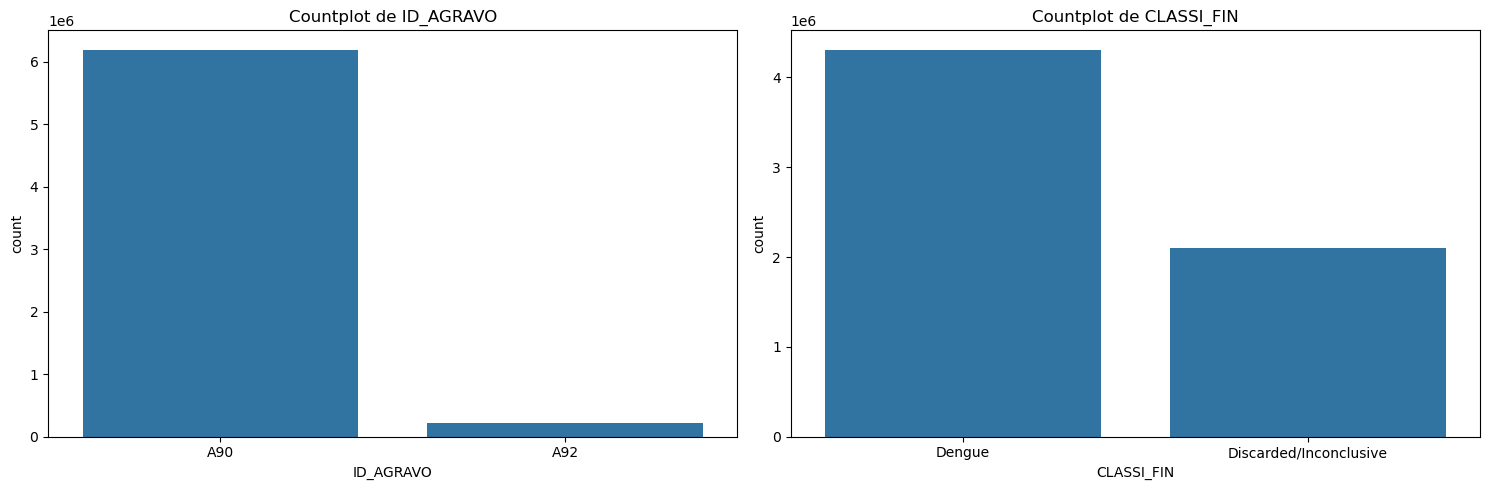

In [ ]:
def plot_count(liste_variables):
    fig, axes = plt.subplots(1, len(liste_variables), figsize=(15, 5))
    for i, variable in enumerate(liste_variables):
        sns.countplot(x=variable, data=ds1, ax=axes[i])
        axes[i].set_title(f'Countplot de {variable}')

    plt.tight_layout()
    plt.show()

plot_count( ['ID_AGRAVO', 'CLASSI_FIN'] )

NU_IDADE_N : L'âge du patient

CS_SEXO : Le sexe du patient
- 1. Homme
- 2. Femme

RS_RACA : Race du patient
- 1. Blanc
- 2. Noir
- 3. Jaune
- 4. Marron
- 5. Autochtone
- 9. Ignoré

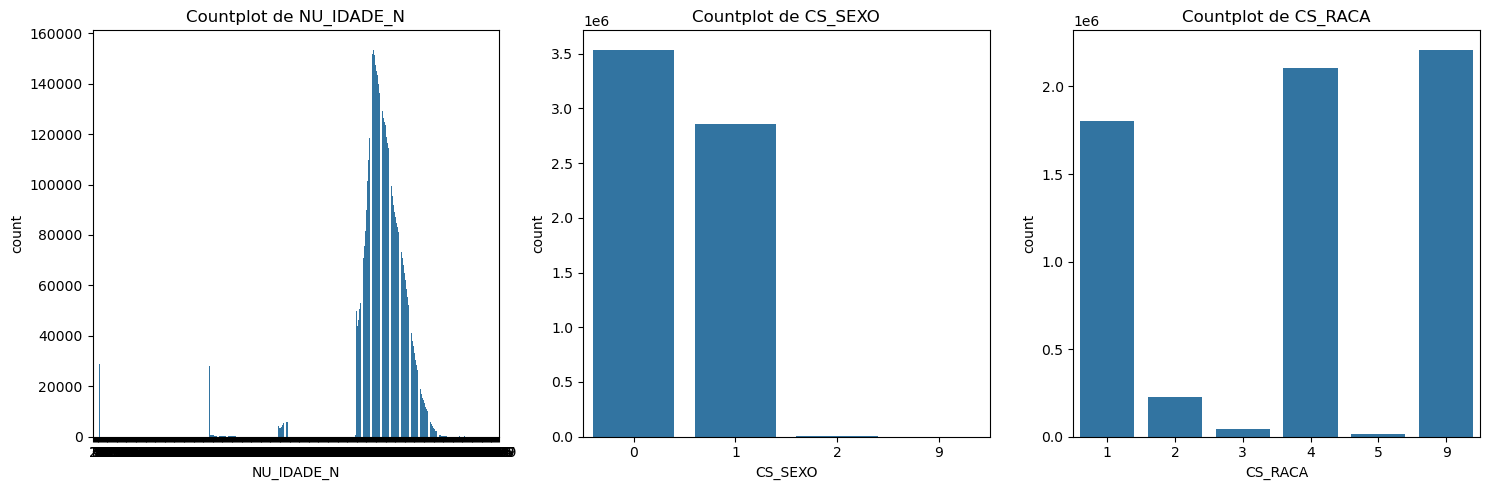

In [ ]:
plot_count( ['NU_IDADE_N', 'CS_SEXO', 'CS_RACA'] )

EVOLUCAO : Évolution du cas
- 1. Guérison
- 2. Décès lié à la maladie
- 3. Décès d'autres causes
- 4. Décès sous investigation
- 9. Ignoré

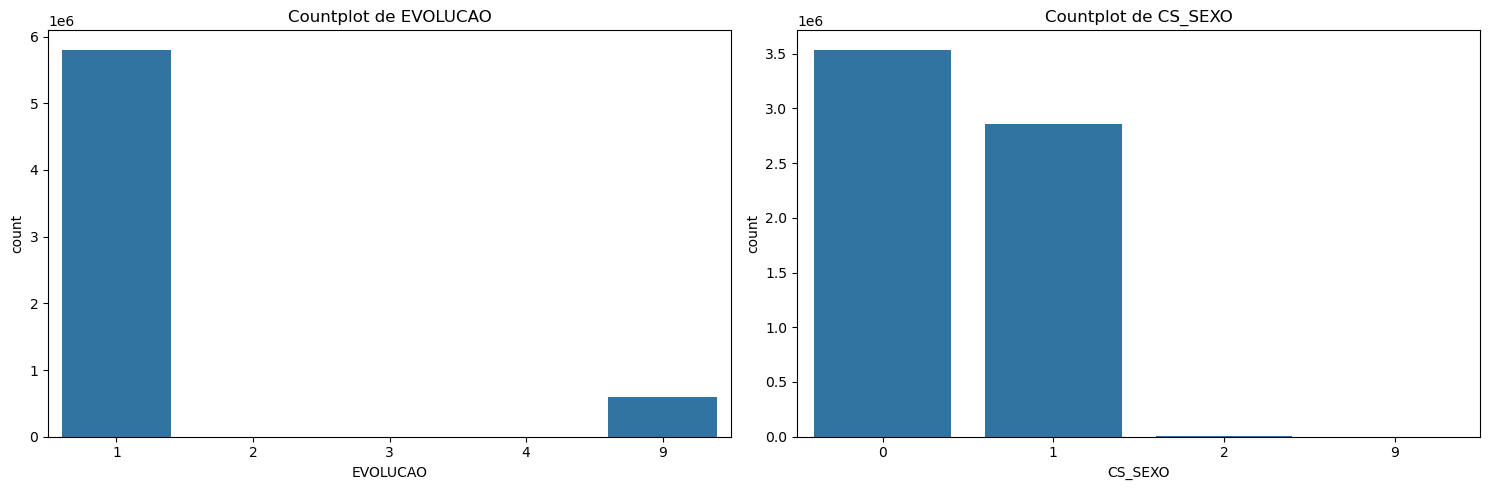

In [ ]:
plot_count( ['EVOLUCAO', 'CS_SEXO'] )

In [ ]:
ds1['DT_NOTIFIC']

0         2018-05-07
1         2018-02-05
2         2018-01-22
3         2018-05-07
4         2018-04-09
             ...    
6732537   2020-06-30
6732538   2020-09-01
6732539   2020-08-03
6732540   2020-04-29
6732541   2020-11-07
Name: DT_NOTIFIC, Length: 6405308, dtype: datetime64[ns]

### Nettoyage et conversion des données de date

In [ ]:
date_columns = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_INVEST', 'DT_ENCERRA']
for col in date_columns:
    ds1[col] = pd.to_datetime(ds1[col], format='%Y-%m-%d', errors='coerce')

ds1.dropna(subset=date_columns, inplace=True)

ds1['ANNEE_NOTIFIC'] = ds1['DT_NOTIFIC'].dt.year
ds1['MOIS_NOTIFIC'] = ds1['DT_NOTIFIC'].dt.month

In [ ]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import phik
colonnes = [
    'CS_SEXO', 'NU_IDADE_N', 'CS_RACA', 'CS_ESCOL_N',
    'HOSPITALIZ', 'EVOLUCAO', 'FEBRE', 'MIALGIA',
    'CEFALEIA', 'DIABETES', 'HEPATOPAT', 'HIPERTENSA',
    'SG_UF', 'COUFINF'
]

ds_corr = ds1[colonnes]
phik_corr = ds_corr.phik_matrix()

print("\nCorrélation Phi_k:\n", phik_corr)

interval columns not set, guessing: ['CS_SEXO', 'NU_IDADE_N', 'CS_RACA', 'CS_ESCOL_N', 'HOSPITALIZ', 'EVOLUCAO', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'DIABETES', 'HEPATOPAT', 'HIPERTENSA', 'SG_UF', 'COUFINF']


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Corrélation Phi_k:
              CS_SEXO  NU_IDADE_N   CS_RACA  CS_ESCOL_N  HOSPITALIZ  EVOLUCAO  \
CS_SEXO     1.000000    0.009989  0.041232    0.054661    0.013556  0.009969   
NU_IDADE_N  0.009989    1.000000  0.021667    0.488517    0.025101  0.126196   
CS_RACA     0.041232    0.021667  1.000000    0.403666    0.227092  0.032748   
CS_ESCOL_N  0.054661    0.488517  0.403666    1.000000    0.157219  0.044035   
HOSPITALIZ  0.013556    0.025101  0.227092    0.157219    1.000000  0.183329   
EVOLUCAO    0.009969    0.126196  0.032748    0.044035    0.183329  1.000000   
FEBRE       0.029125    0.067926  0.295842    0.116506    0.388851  0.034373   
MIALGIA     0.010610    0.085645  0.287559    0.178309    0.392707  0.040870   
CEFALEIA    0.015424    0.092492  0.305060    0.178335    0.388483  0.044361   
DIABETES    0.012600    0.067683  0.260528    0.110324    0.380305  0.030430   
HEPATOPAT   0.006625    0.067237  0.252959    0.084704    0.377958  0.025840   
HIPERTENSA  0.02027

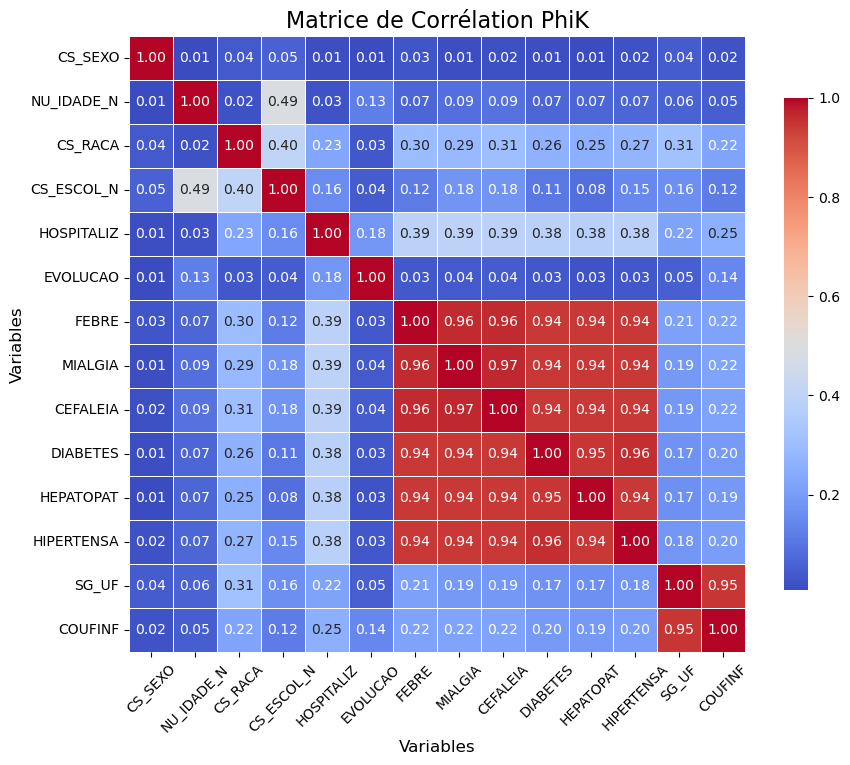

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8}, linewidths=.5)

plt.title('Matrice de Corrélation PhiK', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()  # Afficher la heatmap

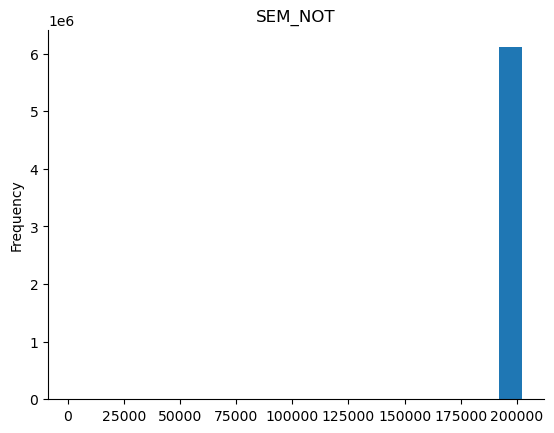

In [ ]:
from matplotlib import pyplot as plt
ds1['SEM_NOT'].plot(kind='hist', bins=20, title='SEM_NOT')
plt.gca().spines[['top', 'right',]].set_visible(False)

Neste grafico conseguimos ver um pico de casos entre as semanas epidemiologicas 15 e 35, o que pode estar relacionado a um evento neste periodo. Isso pode nos permitir fazer uma exploração de eventos nesse que tenham uma correlação com a proliferação da dengue

In [ ]:
# Define o caminho e o nome do arquivo onde será salvo
file_path = "dengue_v20241025.csv"

# Salva o DataFrame no formato CSV
ds1.to_csv(file_path, index=False)

print(f"Dataset salvo com sucesso em: {file_path}")


Dataset salvo com sucesso em: dengue_v20241025.csv
